Look at Jetty Bathymetry from Mesh Mask and create a TS file

In [13]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np 
import cmocean.cm as cm

from salishsea_tools import (
    bathy_tools,
    nc_tools,
    viz_tools,
)

%matplotlib inline

In [23]:
mesh = nc.Dataset('../../NEMO-forcing/grid/mesh_mask_db1_jetty.nc')
mbathy = mesh.variables['mbathy'][0,:,:] 
#used to calculate number of vertical ocean grid cells at each (i,j) (1=land point)
gdepw = mesh.variables['gdepw_0'][0,:,:,:]
surface_tmask = mesh.variables['tmask'][0,0,:,:]
surface_tmask = np.abs(surface_tmask-1)
tmask = mesh.variables['tmask'][0,:,:,:]
tmask = np.abs(tmask-1)
lats = mesh.variables['nav_lat'][:]
lons = mesh.variables['nav_lon'][:]
mesh.close()

In [8]:
NEMO_bathy = np.zeros(mbathy.shape)
for i in range(NEMO_bathy.shape[1]):
    for j in range(NEMO_bathy.shape[0]):
        level = mbathy[j,i]
        NEMO_bathy[j,i] = gdepw[level,j,i]
NEMO_bathy = np.ma.masked_array(NEMO_bathy, mask = surface_tmask)

(47, 51.1)

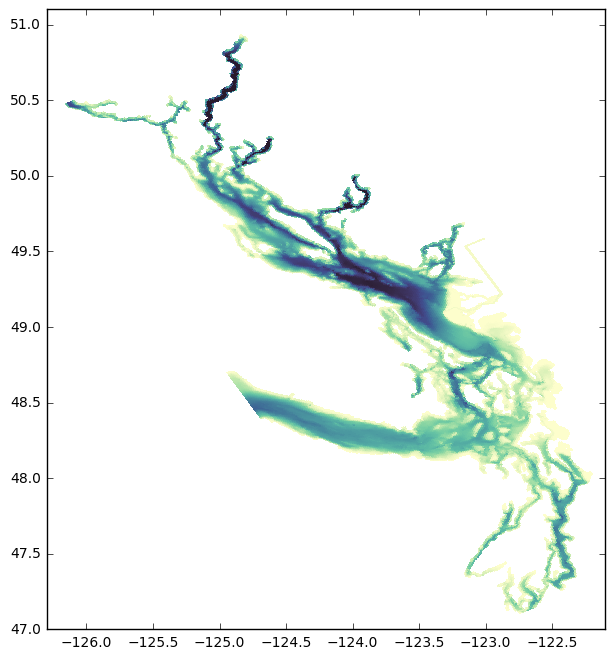

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
viz_tools.set_aspect(ax, coords='map')
plt.pcolormesh(lons, lats, NEMO_bathy, cmap=cm.deep)
ax.set_xlim((-126.3, -122.1))
ax.set_ylim((47, 51.1))

(48.8, 49.6)

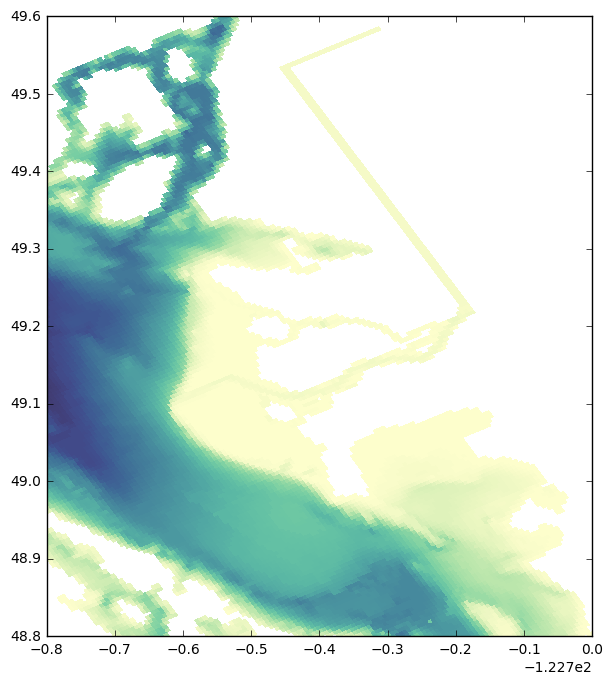

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
viz_tools.set_aspect(ax, coords='map')
plt.pcolormesh(lons, lats, NEMO_bathy, cmap=cm.deep)
ax.set_xlim((-123.5, -122.7))
ax.set_ylim((48.8, 49.6))

(49.05, 49.25)

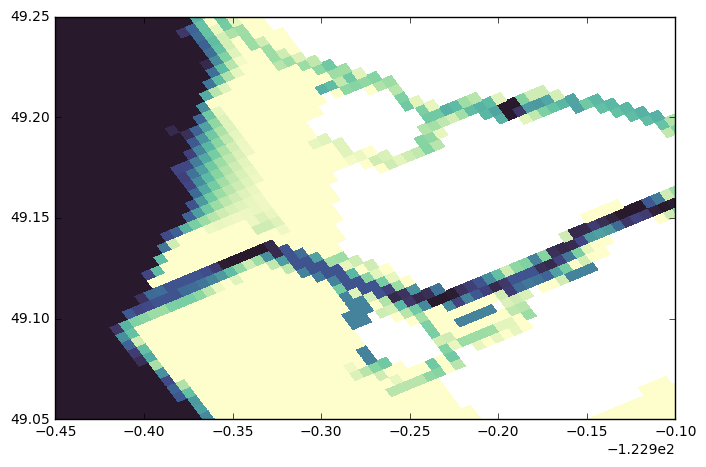

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
viz_tools.set_aspect(ax, coords='map')
plt.pcolormesh(lons, lats, NEMO_bathy, cmap=cm.deep, vmax=15)
ax.set_xlim((-123.35, -123))
ax.set_ylim((49.05, 49.25))

In [22]:
oldmesh = nc.Dataset('../../NEMO-forcing/grid/mesh_mask_downbyone2.nc')
oldmbathy =oldmesh.variables['mbathy'][0,:,:] 
#used to calculate number of vertical ocean grid cells at each (i,j) (1=land point)
oldgdepw = oldmesh.variables['gdepw_0'][0,:,:,:]
oldsurface_tmask = oldmesh.variables['tmask'][0,0,:,:]
oldsurface_tmask = np.abs(oldsurface_tmask-1)
oldtmask = oldmesh.variables['tmask'][0,:,:,:]
oldtmask = np.abs(oldtmask-1)
oldmesh.close()

24


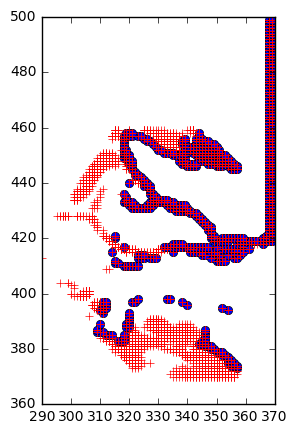

In [56]:
kmax = 0
fig, ax = plt.subplots(1, 1, figsize=(3,5))
for k in range(tmask.shape[0]):
    for i in range(tmask.shape[1]):
        for j in range(tmask.shape[2]):
            if tmask[k,i,j] < oldtmask[k,i,j]:
                if k == 0:
                    plt.plot(j, i, 'bo')
                else:
                    plt.plot(j, i, 'r+')
                    if k > kmax:
                        kmax = k
imin = 360; imax = 500; jmin = 290; jmax = 370
plt.xlim((jmin, jmax))
plt.ylim((imin, imax))
print (kmax)

In [186]:
data = nc.Dataset('/results/SalishSea/nowcast-green/11sep16/SalishSea_00482400_restart.nc')
vosaline = data.variables['sb'][:]
vosaline0 = np.ma.masked_array(vosaline[0], mask = oldtmask)


In [159]:
k=16; i=418; j=363; dd=5
print (tmask[k, i, j], oldtmask[k, i, j])
print (np.ma.mean(vosaline0[k, i-dd:i+dd+1, j-dd:j+dd+1]))

0 1
--


In [276]:
dd = 26
good = 1
while good > 0:
    good = 0; bad = 0; already = 0
    for k in range(kmax+1):
        for i in range(imin, imax+1):
            for j in range(jmin, jmax+1):
                if tmask[k,i,j] < oldtmask[k,i,j]:
                    if vosaline0[k, i, j] > 0:
                        already = already + 1
                    else:
                        vosaline0[k, i, j] = np.ma.mean(vosaline0[k, i-dd:i+dd+1, j-dd:j+dd+1])
                        if vosaline0[k, i, j] > 0:
                            good = good + 1
                        else:
                            bad = bad + 1
    print ('already', already)
    print ('good', good)
    print ('bad', bad)



already 8304
good 6
bad 1
already 8310
good 1
bad 0
already 8311
good 0
bad 0


good = 0; good2 = 0; good3 = 0; good4 = 0
for k in range(kmax+1):
    for i in range(imin, imax+1):
        for j in range(jmin, jmax+1):
            if tmask[k,i,j] < oldtmask[k,i,j]:
                vosaline0[k, i, j] = np.ma.mean(vosaline0[k, i-dd:i+dd+1, j-dd:j+dd+1])
                if vosaline0[k, i, j] > 0:
                    good = good + 1
                else:
                    vosaline0[k, i, j] = np.ma.mean(vosaline0[k, i-2*dd:i+2*dd+1, j-2*dd:j+2*dd+1])
                    if vosaline0[k, i, j] > 0:
                        good2 = good2 + 1
                    else:
                        vosaline0[k, i, j] = np.ma.mean(vosaline0[k, i-5*dd:i+5*dd+1, j-5*dd:j+5*dd+1])
                        if vosaline0[k, i, j] > 0:
                            good3 = good3 + 1
                        else:
                            vosaline0[k, i, j] = np.ma.mean(vosaline0[k, i-8*dd:i+8*dd+1, j-8*dd:j+8*dd+1])
                            if vosaline0[k, i, j] > 0:
                                good4 = good4 + 1
                            else:
                                print (k, i, j, vosaline0[k, i, j])
print ('good', good)
print ('good2', good2)
print ('good3', good3)
print ('good4', good4)


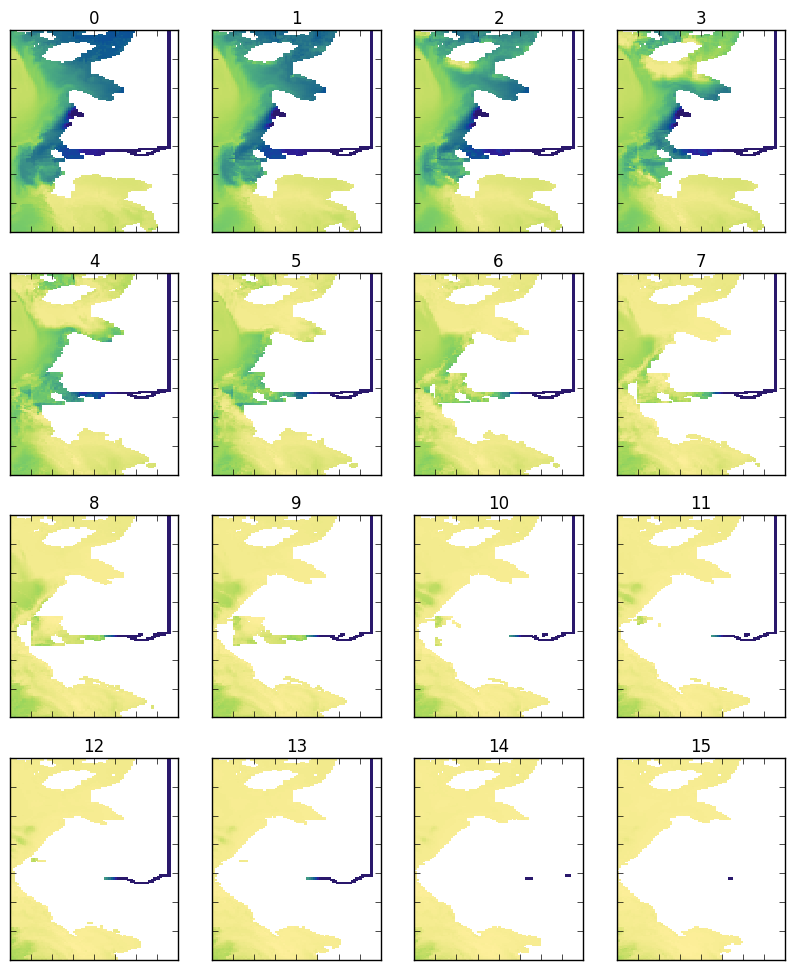

In [277]:
fig, axs = plt.subplots(4, 4, figsize=(10,12))
for k, ax in enumerate([axs[0,0], axs[0, 1], axs[0, 2], axs[0, 3],
                         axs[1,0], axs[1, 1], axs[1, 2], axs[1,3],
                         axs[2,0], axs[2, 1], axs[2, 2], axs[2,3],
                         axs[3,0], axs[3, 1], axs[3, 2], axs[3,3]]):
    mesh = ax.pcolormesh(range(jmin, jmax), range(imin, imax), 
                         np.ma.masked_array(vosaline[0, k, imin:imax, jmin:jmax], oldtmask[k, imin:imax, jmin:jmax]),
                         cmap =cm.haline, vmax=30.5)
    ax.tick_params(axis='x', which='both', labelbottom='off')
    ax.tick_params(axis='y', which='both', labelleft='off')
    ax.set_title(k)

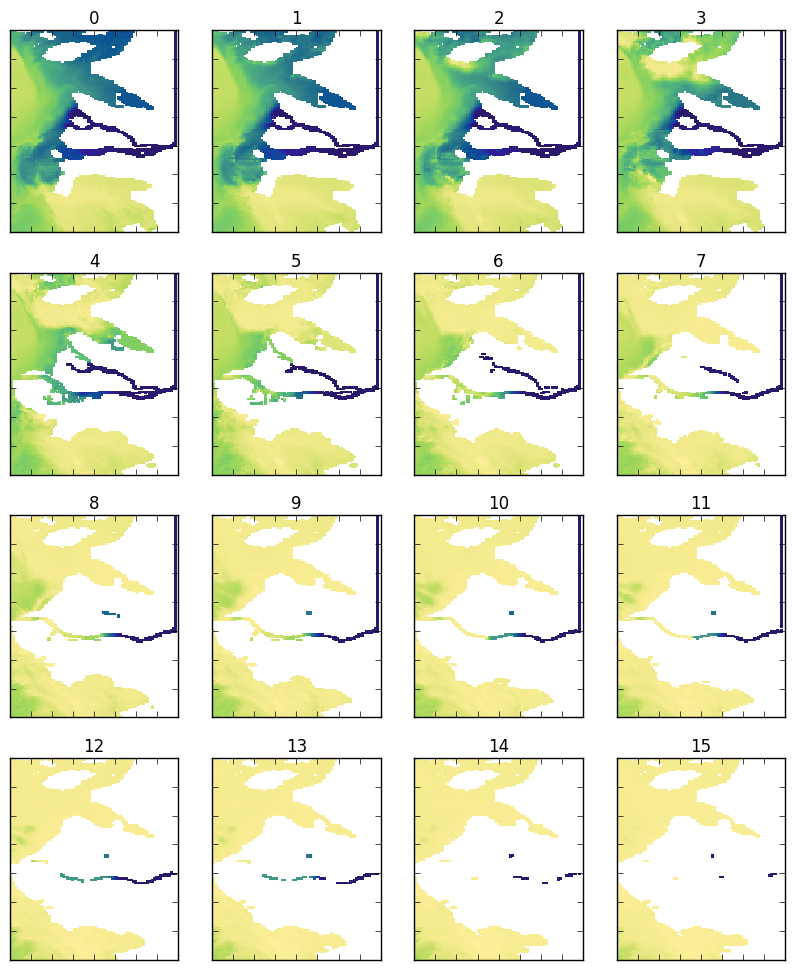

In [280]:
fig, axs = plt.subplots(4, 4, figsize=(10,12))
for k, ax in enumerate([axs[0,0], axs[0, 1], axs[0, 2], axs[0, 3],
                         axs[1,0], axs[1, 1], axs[1, 2], axs[1,3],
                         axs[2,0], axs[2, 1], axs[2, 2], axs[2,3],
                         axs[3,0], axs[3, 1], axs[3, 2], axs[3,3]]):
    mesh = ax.pcolormesh(range(jmin, jmax), range(imin, imax), 
                         np.ma.masked_array(vosaline0[k, imin:imax, jmin:jmax], tmask[k, imin:imax, jmin:jmax]),
                         cmap = cm.haline, vmax=30.5)
    ax.tick_params(axis='x', which='both', labelbottom='off')
    ax.tick_params(axis='y', which='both', labelleft='off')
    ax.set_title(k)

In [281]:
data.close()

In [287]:
dataphys = nc.Dataset('/results/SalishSea/nowcast-green/11sep16/SalishSea_00482400_restart.nc')
databio = nc.Dataset('/results/SalishSea/nowcast-green/11sep16/SalishSea_00482400_restart_trc.nc')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    file_name: SalishSea_00482400_restart_trc.nc
    TimeStamp: 11/09/2016 21:10:27 -0700
    history: Sun Sep 11 21:15:41 2016: ncks -4 -L4 -O SalishSea_00482400_restart_trc.nc SalishSea_00482400_restart_trc.nc
    NCO: 4.4.2
    dimensions(sizes): t(1), z(40), y(898), x(398)
    variables(dimensions): float64 TRBDOC(t,z,y,x), float64 TRBMICZ(t,z,y,x), float64 TRBMYRI(t,z,y,x), float64 TRBNH4(t,z,y,x), float64 TRBNO3(t,z,y,x), float64 TRBO2(t,z,y,x), float64 TRBPHY(t,z,y,x), float64 TRBPHY2(t,z,y,x), float64 TRBPOC(t,z,y,x), float64 TRBSi(t,z,y,x), float64 TRBbSi(t,z,y,x), float64 TRNDOC(t,z,y,x), float64 TRNMICZ(t,z,y,x), float64 TRNMYRI(t,z,y,x), float64 TRNNH4(t,z,y,x), float64 TRNNO3(t,z,y,x), float64 TRNO2(t,z,y,x), float64 TRNPHY(t,z,y,x), float64 TRNPHY2(t,z,y,x), float64 TRNPOC(t,z,y,x), float64 TRNSi(t,z,y,x), float64 TRNbSi(t,z,y,x), float64 adatrj(), float64 kt(), float32 nav_lat(y,x), flo

In [288]:
physical = ['tn', 'sn']
biological = ['TRNDOC', 'TRNMICZ','TRNMYRI','TRNNH4','TRNNO3','TRNO2',
              'TRNPHY','TRNPHY2','TRNPOC','TRNSi','TRNbSi']
varas = {}
for vb in physical:
    temporary = dataphys.variables[vb][0, :]
    varas[vb] = np.ma.masked_array(temporary, mask = oldtmask)
for vb in biological:
    temporary = databio.variables[vb][0, :]
    varas[vb] = np.ma.masked_array(temporary, mask = oldtmask)
dataphys.close()
databio.close()
varall = physical + biological

In [290]:
def find_mean(varas, varall, i, j, k, dd):
    for vb in varall:
        varas[vb][k, i, j] = np.ma.mean(varas[vb][k, i-dd:i+dd+1, j-dd:j+dd+1])
    return varas

In [291]:
dd = 1
bad = 1
while bad > 0:
    dd += 1
    good = 1
    while good > 0:
        good = 0; bad = 0; already = 0
        for k in range(kmax+1):
            for i in range(imin, imax+1):
                for j in range(jmin, jmax+1):
                    if tmask[k,i,j] < oldtmask[k,i,j]:
                        if varas['sn'][k, i, j] > 0:
                            already = already + 1
                        else:
                            varas = find_mean(varas, varall, i, j, k, dd)
                            if varas['sn'][k, i, j] > 0:
                                good = good + 1
                            else:
                                bad = bad + 1
    print ('already', already)
    print ('good', good)
    print ('bad', bad)



already 7928
good 0
bad 383
already 8098
good 0
bad 213
already 8172
good 0
bad 139
already 8194
good 0
bad 117
already 8210
good 0
bad 101
already 8249
good 0
bad 62
already 8249
good 0
bad 62
already 8249
good 0
bad 62
already 8249
good 0
bad 62
already 8249
good 0
bad 62
already 8262
good 0
bad 49
already 8264
good 0
bad 47
already 8291
good 0
bad 20
already 8299
good 0
bad 12
already 8299
good 0
bad 12
already 8299
good 0
bad 12
already 8304
good 0
bad 7
already 8304
good 0
bad 7
already 8304
good 0
bad 7
already 8304
good 0
bad 7
already 8304
good 0
bad 7
already 8304
good 0
bad 7
already 8304
good 0
bad 7
already 8304
good 0
bad 7
already 8311
good 0
bad 0


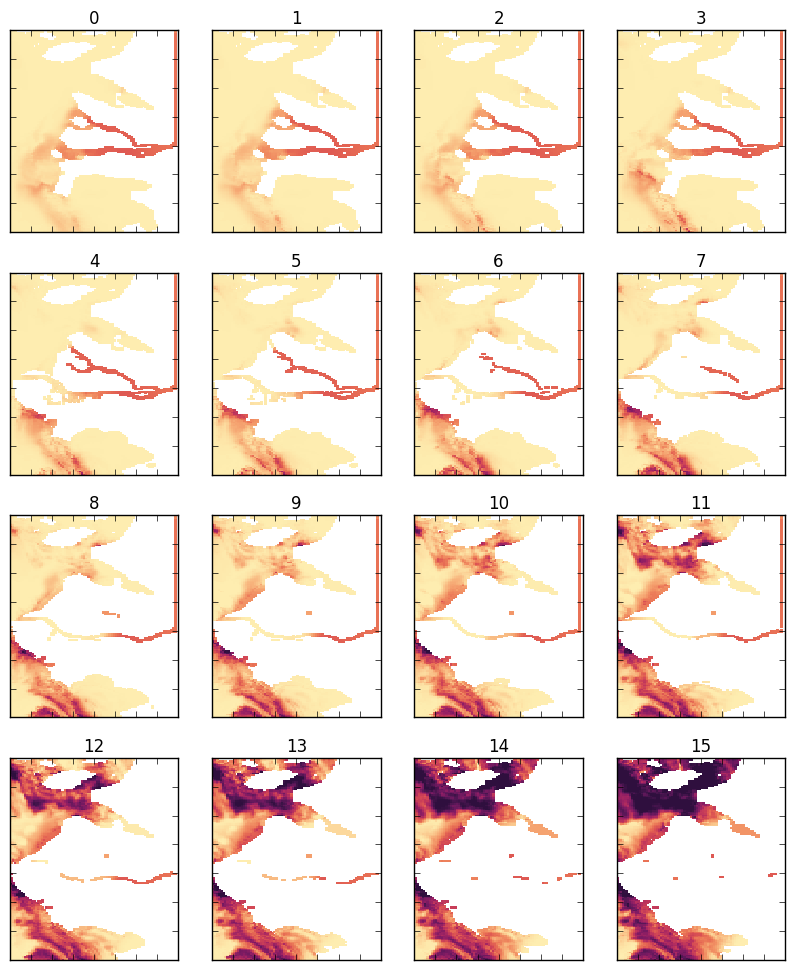

In [294]:
fig, axs = plt.subplots(4, 4, figsize=(10,12))
for k, ax in enumerate([axs[0,0], axs[0, 1], axs[0, 2], axs[0, 3],
                         axs[1,0], axs[1, 1], axs[1, 2], axs[1,3],
                         axs[2,0], axs[2, 1], axs[2, 2], axs[2,3],
                         axs[3,0], axs[3, 1], axs[3, 2], axs[3,3]]):
    mesh = ax.pcolormesh(range(jmin, jmax), range(imin, imax), 
                         np.ma.masked_array(varas['TRNNO3'][k, imin:imax, jmin:jmax], tmask[k, imin:imax, jmin:jmax]),
                         cmap = cm.matter, vmax=16)
    ax.tick_params(axis='x', which='both', labelbottom='off')
    ax.tick_params(axis='y', which='both', labelleft='off')
    ax.set_title(k)

In [307]:
# build nc file
new_initialfile = nc.Dataset('Jetty11Sep16_initial.nc', 'w')
nc_tools.init_dataset_attrs(
    new_initialfile, 
    title='All tracers for Jetty Bathy from nowcast-green 11Sep2016', 
    notebook_name='analysis-susan/notebooks/JettyBathymetryTracers', 
    nc_filepath='NEMO-forcing/initial_strat/Jetty11Sep16_initial.nc',
    comment='All Tracers, physical and biological')
new_initialfile.createDimension('y', 898)
new_initialfile.createDimension('x', 398)

file format: NETCDF4
Conventions: CF-1.6
title: All tracers for Jetty Bathy from nowcast-green 11Sep2016
institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
source: https://bitbucket.org/salishsea/tools/src/tip/analysis-susan/notebooks/JettyBathymetryTracers.ipynb
references: REQUIRED
history: [2016-12-28 16:21:04] Created netCDF4 zlib=True dataset.
comment: All Tracers, physical and biological


<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398

In [308]:
thevara = {}
for count, vb in enumerate(varall):
    thevara[vb] = new_initialfile.createVariable(
        vb, 'float32', ('y','x'), zlib=True,
        least_significant_digit=0.00001, fill_value=0)
    thevara[vb] = varas[vb]
new_initialfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: All tracers for Jetty Bathy from nowcast-green 11Sep2016
    institution: Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    source: https://bitbucket.org/salishsea/tools/src/tip/analysis-susan/notebooks/JettyBathymetryTracers.ipynb
    references: REQUIRED
    history: [2016-12-28 16:21:04] Created netCDF4 zlib=True dataset.
    comment: All Tracers, physical and biological
    dimensions(sizes): y(898), x(398)
    variables(dimensions): float32 tn(y,x), float32 sn(y,x), float32 TRNDOC(y,x), float32 TRNMICZ(y,x), float32 TRNMYRI(y,x), float32 TRNNH4(y,x), float32 TRNNO3(y,x), float32 TRNO2(y,x), float32 TRNPHY(y,x), float32 TRNPHY2(y,x), float32 TRNPOC(y,x), float32 TRNSi(y,x), float32 TRNbSi(y,x)
    groups: 

In [309]:
new_initialfile.close()